In [1]:
LOGIC = ["Negation", "Double negation", "Intervals/Numbers", "Conjunction", "Disjunction",
          "Conditionals", "Universal", "Existential", "Temporal", "Upward monotone",
          "Downward monotone", "Non-monotone",
        ]
LEXSEM = ["Lexical entailment", "Morphological negation", "Factivity", "Symmetry/Collectivity",
            "Redundancy", "Named entities", "Quantifiers",
         ]
PAS = ["Core args", "Prepositional phrases", "Ellipsis/Implicits", "Anaphora/Coreference",
        "Active/Passive", "Nominalization", "Genitives/Partitives", "Datives", "Relative clauses",
        "Coordination scope", "Intersectivity", "Restrictivity",
      ]
KNOWLEDGE = ["Common sense", "World knowledge"]

In [2]:
from allennlp.predictors.predictor import Predictor
import allennlp_models.structured_prediction

ie_extractor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/openie-model.2020.03.26.tar.gz")

error loading _jsonnet (this is expected on Windows), treating C:\Users\Admin\AppData\Local\Temp\tmp2c2xwgeu\config.json as plain json


## Potentail Chunking Method

In [2]:
import os
from Udep2Mono.util import *
from Udep2Mono.dependency_parse import dependency_parse
from Udep2Mono.binarization import BinaryDependencyTree, Binarizer
from Udep2Mono.polarization import PolarizationPipeline

from nltk.tree import Tree
from nltk.draw import TreeWidget
from nltk.draw.util import CanvasFrame
from IPython.display import Image, display

def jupyter_draw_nltk_tree(tree):
    cf = CanvasFrame()
    tc = TreeWidget(cf.canvas(), tree)
    tc['node_font'] = 'arial 14 bold'
    tc['leaf_font'] = 'arial 14'
    tc['node_color'] = '#005990'
    tc['leaf_color'] = '#3F8F57'
    tc['line_color'] = '#175252'
    cf.add_widget(tc, 20, 20)
    os.system('rm -rf ../data/tree.png')
    os.system('rm -rf ../data/tree.ps')
    cf.print_to_file('../data/tree.ps')
    cf.destroy()
    os.system('convert ../data/tree.ps ../data/tree.png')
    display(Image(filename='../data/tree.png'))
    
binarizer = Binarizer()

2021-03-24 23:34:57 INFO: Loading these models for language: en (English):
| Processor | Package                  |
----------------------------------------
| tokenize  | ../model/e...ize/gum.pt  |
| pos       | ../model/en/pos/ewt.pt   |
| lemma     | ../model/en/lemma/gum.pt |
| depparse  | ../model/e...rse/gum.pt  |

2021-03-24 23:34:57 INFO: Use device: gpu
2021-03-24 23:34:57 INFO: Loading: tokenize
2021-03-24 23:34:59 INFO: Loading: pos
2021-03-24 23:34:59 INFO: Loading: lemma
2021-03-24 23:34:59 INFO: Loading: depparse
2021-03-24 23:35:00 INFO: Done loading processors!
2021-03-24 23:35:00 INFO: Loading these models for language: en (English):
| Processor | Package                 |
---------------------------------------
| tokenize  | ../model/e...ize/gum.pt |

2021-03-24 23:35:00 INFO: Use device: cpu
2021-03-24 23:35:00 INFO: Loading: tokenize
2021-03-24 23:35:00 INFO: Done loading processors!


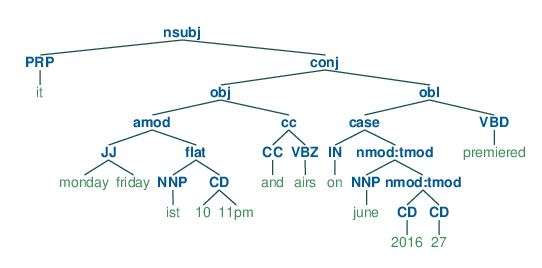

In [30]:
pipeline = PolarizationPipeline()
sentence = "It premiered on 27 June, 2016 and airs Monday-Friday 10-11pm IST"
parsed, replaced = dependency_parse(sentence, pipeline.parser)
binary_dep, relation = pipeline.run_binarization(parsed, replaced, sentence)
sexpression = pipeline.postprocess(binary_dep, replaced).replace("[", "(").replace("]",")")
btreeViz = Tree.fromstring(sexpression)
jupyter_draw_nltk_tree(btreeViz) 

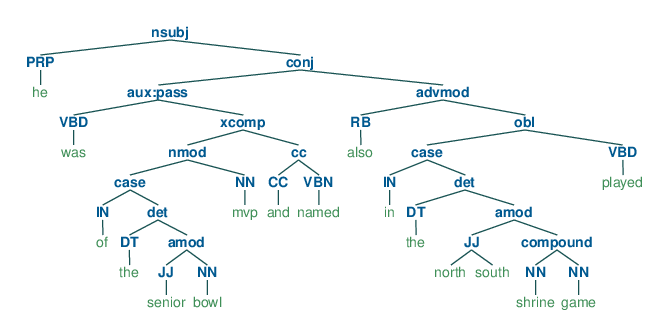

In [31]:
sentence = "He also played in the North-South Shrine Game and was named MVP of the Senior Bowl"
parsed, replaced = dependency_parse(sentence, pipeline.parser)
binary_dep, relation = pipeline.run_binarization(parsed, replaced, sentence)
sexpression = pipeline.postprocess(binary_dep, replaced).replace("[", "(").replace("]",")")
btreeViz = Tree.fromstring(sexpression)
jupyter_draw_nltk_tree(btreeViz) 

[['nsubj', 1, 2], ['root', 2, 'root'], ['det', 3, 5], ['amod', 4, 5], ['obj', 5, 2], ['obl:tmod', 6, 2], ['case', 7, 8], ['obl', 8, 2]]
{'John': (1, 'NNP'), 'ate': (2, 'VBD'), 'some': (3, 'DT'), 'red': (4, 'JJ'), 'apples': (5, 'NNS'), 'yesterday': (6, 'NN'), 'with': (7, 'IN'), 'Lucy': (8, 'NNP')}


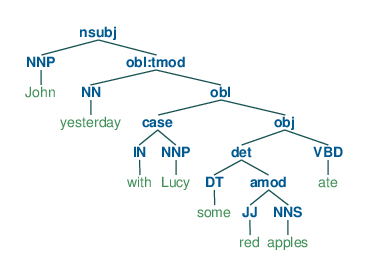

['with', 'Lucy']
['ate', 'some', 'red', 'apples']
['some', 'red', 'apples']
['red', 'apples']


In [4]:
phrase_tags = ["nsubj", "xcomp", "obj", "csubj", "acl", "advcl", "acl:relcl", "advmod", "amod", "det", "nmod","case"]

def collect_phrases(tree, phrases):
    if tree.val in phrase_tags and not tree.is_root:
        phrases.append(tree.copy())
    if tree.left.is_tree:
        collect_phrases(tree.left, phrases)
    if tree.right.is_tree:
        collect_phrases(tree.right, phrases)

pipeline = PolarizationPipeline()

sentence = "John ate some red apples yesterday with Lucy"
parsed, replaced = dependency_parse(sentence, pipeline.parser)
print(parsed[0])
print(parsed[1])
binary_dep, relation = pipeline.run_binarization(parsed, replaced, sentence)
phrases = []
sexpression = pipeline.postprocess(binary_dep, replaced).replace("[", "(").replace("]",")")
btreeViz = Tree.fromstring(sexpression)
jupyter_draw_nltk_tree(btreeViz)
collect_phrases(binary_dep, phrases)
for tree in phrases:
    print([x[0] for x in list(tree.sorted_leaves().popkeys())])

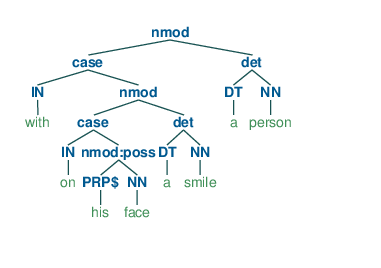

['with', 'a', 'smile', 'on', 'his', 'face']
['a', 'smile', 'on', 'his', 'face']
['on', 'his', 'face']
['a', 'smile']
['a', 'person']


In [33]:
sentence = "A person with a smile on his face"
parsed, replaced = dependency_parse(sentence, pipeline.parser)
binary_dep, relation = pipeline.run_binarization(parsed, replaced, sentence)
phrases = []
sexpression = pipeline.postprocess(binary_dep, replaced).replace("[", "(").replace("]",")")
btreeViz = Tree.fromstring(sexpression)
jupyter_draw_nltk_tree(btreeViz) 
collect_phrases(binary_dep, phrases)
for tree in phrases:
    print([x[0] for x in list(tree.sorted_leaves().popkeys())])

## Passive to Active and Active to Passive

In [3]:
from pattern.en import conjugate, lemma, lexeme, PAST, PRESENT, PARTICIPLE

def pass2act(sentence, postag):
    ie_pred = ie_extractor.predict(sentence)['verbs']
    
    def fix_info(desc):
        out = desc.replace("ARG0: ", "")
        out = out.replace("ARG1: ", "")
        out = out.replace("V: ", "")
        out = out.replace("[", "")
        out = out.replace("]", ",")
        out = out.split(",")
        return out
    
    def get_aux(noun, verb):
        aux = "is"
        if postag[noun][1] == "NN":
            if postag[verb][1] == "VBD":
                aux = "was"
            elif postag[verb][1] == "VBS":
                aux = "will be"
            else:
                aux = "is"
        elif postag[noun][1] == "NNS":
            if postag[verb][1] == "VBD":
                aux = "were"
            elif postag[verb][1] == "VBS":
                aux = "will be"
            else:
                aux = "are"
        return aux + " "
        
    
    for verb in ie_pred:
        predicate = fix_info(verb['description'])
        print(predicate)
        passive = [0,0,0]
        passive[0] = predicate[2].strip()
        passive[2] = "by " + predicate[0].strip()
        passive_verb = conjugate(predicate[1].strip(), (PAST,PARTICIPLE), 1)
        parsed, _ = dependency_parse(passive[0], "stanza")
        tree, _, words = parsed 
        noun = ""
        for node in tree:
            if node[0] == "root":
                noun = words[node[1]][0]
                print(noun)
        aux = get_aux(noun, predicate[1].strip())
        passive[1] = aux + passive_verb
        print(passive)

In [1]:
def fix_info(desc):
    out = desc.replace("[ARG0: ", "")
    out = out.replace("[ARG1: ", "")
    out = out.replace("[V: ", "")
    out = out.replace("]", ",")
    out = out.split(",")
    return out

def get_aux(noun, verb):
    aux = "is"
    if postag[noun][1] == "NN":
        if postag[verb][1] == "VBD":
            aux = "was"
        elif postag[verb][1] == "VBS":
            aux = "will be"
        else:
            aux = "is"
    elif postag[noun][1] == "NNS":
        if postag[verb][1] == "VBD":
            aux = "were"
        elif postag[verb][1] == "VBS":
            aux = "will be"
        else:
            aux = "are"
    return aux + " "

In [3]:
def fix_info(desc):
    out = desc.replace("[ARG0: ", "")
    out = out.replace("[ARG1: ", "")
    out = out.replace("[ARG2: ", "")
    out = out.replace("[ARGM-DIR: ", "")
    out = out.replace("[ARGM-ADV: ", "")
    out = out.replace("[ARGM-LOC: ", "")
    out = out.replace("[V: ", "")
    out = out.replace("]", ",")
    out = out.split(",")
    return out

In [3]:
def extract_context(sentence, ie_pred):
    context = []
    for verb in ie_pred:
        if "ARG" in verb['description']:
            is_obj = False
            rel = []
            subj = []
            obj = []
            for word, tag in zip(sentence.replace(',', ' ,').split(' '), verb['tags']):
                if tag == 'O':
                    rel.append(word)
                elif tag == 'B-V':
                    rel.append(word)
                    is_obj = True
                elif 'ARG' in tag and not is_obj:
                    subj.append(word.replace(' ,', ','))
                elif 'ARG' in tag and is_obj:
                    obj.append(word.replace(' ,', ','))
            context.append((subj, rel, obj))
    return context

In [50]:
s1 = "A big wave is being ridden by a surfer across dark green water"
s2 = "The surfer is riding a big wave"

ie_pred1 = ie_extractor.predict(s1)['verbs']
ie_pred2 = ie_extractor.predict(s2)['verbs']

def check_passact(ie1, ie2):
    for verb in ie1:
        if 'ARG1' in verb['tags'][0] or 'ARG1' in verb['tags'][1]:
            return True

    for verb in ie2:
        if 'ARG1' in verb['tags'][0] or 'ARG1' in verb['tags'][1]:
            return True
    
    return False

check_passact(ie_pred1, ie_pred2)

True

In [4]:
import torch
roberta = torch.hub.load('pytorch/fairseq', 'roberta.large.mnli')
_eval = roberta.eval()

Using cache found in C:\Users\Admin/.cache\torch\hub\pytorch_fairseq_master


In [5]:
from copy import deepcopy

knowledge_base = {}

def abduction(seq1, seq2, label):
    ie_pred_a = ie_extractor.predict(seq1)['verbs']
    ie_pred_b = ie_extractor.predict(seq2)['verbs']
    context_a = extract_context(seq1, ie_pred_a)
    context_b = extract_context(seq2, ie_pred_b)

    #print(context_a)
    #print(context_b)

    def check_quality(pair, label):
        new_pair1 = deepcopy(pair[0])
        new_pair2 = deepcopy(pair[1])

        for w in pair[0]:
            if w in new_pair1 and w in new_pair2 and len(new_pair1) > 0 and len(new_pair2) > 0:
                new_pair1.remove(w)
                new_pair2.remove(w)

        if label == 3:
            if "not" in pair[0] or "not" in pair[1]:
                return ()
            if "no" in pair[0] or "no" in pair[1]:
                return ()

        return (new_pair1, new_pair2)

    def add_knowledge(seqs, label):
        pair = check_quality(seqs,label)
        if len(pair) < 1:
            return
        
        phrase1 = ' '.join(pair[0])
        phrase2 = ' '.join(pair[1])

        tokens = roberta.encode(phrase1, phrase2)
        pred = roberta.predict('mnli', tokens).argmax().cpu().item()
        if pred != 0:
            return

        if phrase1 != phrase2 and phrase1 != "" and phrase2 != "":
            if phrase1+':'+phrase2 in knowledge_base:
                knowledge_base[phrase1+':'+phrase2][label+1] += 1
            else:
                label_list = [phrase1, phrase2, 0,0,0]
                label_list[label+1] += 1
                knowledge_base[phrase1+':'+phrase2] = label_list

    for c1 in context_a:
        for c2 in context_b:
            add_knowledge((c1[0], c2[0]), label)
            add_knowledge((c1[1], c2[1]), label)
            add_knowledge((c1[2], c2[2]), label)         

In [6]:
knowledge_base = {}
P = "The young girl is blowing a bubble that is huge"
H = "The young girl is blowing a bubble that is very small"

abduction(P, H, 1)
knowledge_base

{'huge:very small': ['huge', 'very small', 2, 0, 0],
 'The young girl:a bubble that': ['The young girl', 'a bubble that', 1, 0, 0],
 'a bubble that is huge:very small': ['a bubble that is huge',
  'very small',
  1,
  0,
  0],
 'huge:a bubble that is very small': ['huge',
  'a bubble that is very small',
  1,
  0,
  0]}

In [7]:
knowledge_base = {}
P = "A hiker is on top of the mountain and is dancing"
H = "There is no hiker is on top of the mountain and is dancing"

P = "A biker is naked"
H = "A biker is wearing gear which is black"

abduction(P, H, 1)
knowledge_base

{'naked:gear which is black': ['naked', 'gear which is black', 1, 0, 0]}

In [21]:
entail_p = []
entail_h = []
neutral_p = []
neutral_h = []
contra_p = []
contra_h = []

with open("../data/SICk/train_entail.txt", 'r') as sick_entail:
    lines = sick_entail.readlines()
    for i in range(len(lines) // 3):
        entail_p.append(lines[i*3])
        entail_h.append(lines[i*3+1])
        

with open("../data/SICk/train_neutral.txt", 'r') as sick_noun:
    lines = sick_noun.readlines()
    for i in range(len(lines) // 3):
        neutral_p.append(lines[i*3])
        neutral_h.append(lines[i*3+1])
        

with open("../data/SICk/train_contradict.txt", 'r') as sick_contra:
    lines = sick_contra.readlines()
    for i in range(len(lines) // 3):
        contra_p.append(lines[i*3])
        contra_h.append(lines[i*3+1])
        
print(len(entail_p))
print(len(entail_h))
print(len(neutral_p))
print(len(neutral_h))
print(len(contra_p))
print(len(contra_h))

1298
1298
2535
2535
664
664


In [23]:
from tqdm import tqdm

In [109]:
from tqdm import tqdm

for i in tqdm(range(len(entail_p))):
    abduction(entail_p[i].replace('\n',''), entail_h[i].replace('\n',''), 1)

100%|██████████| 1298/1298 [03:16<00:00,  6.60it/s]


In [110]:
for i in tqdm(range(len(neutral_p))):
    abduction(neutral_p[i].replace('\n',''), neutral_h[i].replace('\n',''), 2)

100%|██████████| 2535/2535 [06:27<00:00,  6.55it/s]


In [46]:
for i in tqdm(range(len(contra_p))):
    abduction(contra_p[i].replace('\n',''), contra_h[i].replace('\n',''), 3)

100%|██████████| 664/664 [06:13<00:00,  1.78it/s]


In [48]:
import pandas as pd

df = pd.DataFrame.from_dict(knowledge_base, orient='index',columns=['phrase_A', 'phrase_B', 'E', 'N', 'C'])
df.head(10)

,phrase_A,phrase_B,E,N,C
A:no,A,no,2,0,0
an empty:a full,an empty,a full,0,0,1
one kid:none of the kids,one kid,none of the kids,0,0,2
Five:none of the,Five,none of the,0,0,1
one kid a gun:Five kids close together,one kid a gun,Five kids close together,0,0,1
one kid:Five kids,one kid,Five kids,0,0,1
Five close together:none of the a gun,Five close together,none of the a gun,0,0,1
is jumping:isn't over,is jumping,isn't over,0,0,1
Several people:Nobody,Several people,Nobody,0,0,1
A:No,A,No,0,0,8


In [49]:
df.to_csv("knowledge.csv")

In [37]:
parsed, replaced = dependency_parse("John took some apples", "stanza")
tree, postag, words = parsed
pass2act("John took some apples", postag)

['John', ' took', ' some apples', '']
apples
['some apples', 'were taken', 'by John']


In [6]:
parsed, replaced = dependency_parse("John took my exam yesterday", "stanza")
tree, postag, words = parsed
pass2act("John took my exam yesterday", postag)

['John', ' took', ' my exam', ' ARGM-TMP: yesterday', '']
exam
['my exam', 'was taken', 'by John']


In [1]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("A man, a women, and two children are walking on the beach")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

two 20 23 CARDINAL


In [1]:
import spacy

nlp = spacy.load("en_core_web_sm")
print("Pipeline:", nlp.pipe_names)
doc = nlp("I, a woman, and a children are walking.")
for i in range(len(doc)):
    token = doc[i]
    print(token.morph)  # 'Case=Nom|Number=Sing|Person=1|PronType=Prs'
    print(token.morph.get("PronType"))  # ['Prs']

Pipeline: ['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']
Case=Nom|Number=Sing|Person=1|PronType=Prs
['Prs']
PunctType=Comm
[]
Definite=Ind|PronType=Art
['Art']
Number=Sing
[]
PunctType=Comm
[]
ConjType=Cmp
[]
Definite=Ind|PronType=Art
['Art']
Number=Plur
[]
Mood=Ind|Tense=Pres|VerbForm=Fin
[]
Aspect=Prog|Tense=Pres|VerbForm=Part
[]
PunctType=Peri
[]


In [28]:
from gensim.models.keyedvectors import KeyedVectors
word_vecs = KeyedVectors.load_word2vec_format('../model/numberbatch-en.txt', binary=False)

In [30]:
word_vecs.save('numberbatch-en.gensim')
model = KeyedVectors.load('numberbatch-en.gensim', mmap='r')

In [93]:
model.wmdistance('boy', 'male_child')

0.9766295794875614

In [64]:
model.similar_by_word('animal')

[('speartooth_shark', 0.9956071972846985),
 ('awake_thing', 0.9956071972846985),
 ('fictional_animal', 0.9956071972846985),
 ('dicrocoelium_dendriticum', 0.9956071972846985),
 ('range_animal', 0.9956071972846985),
 ('animalhood', 0.9810202121734619),
 ('animalkind', 0.9714459776878357),
 ('fat_animal', 0.9649683237075806),
 ('short_animal', 0.9593656063079834),
 ('tall_thing', 0.9593656063079834)]

In [98]:
model.distance("boy", "man")

0.4686582684516907

In [111]:
from nltk.parse import CoreNLPParser
parser = CoreNLPParser(url='http://localhost:9000')

In [143]:
tree = str(list(parser.raw_parse('I bought a box to store candy'))).replace("[", "").replace("]", "").replace("Tree", "").replace(",", "").replace("'", "")

In [144]:
from nltk.tree import Tree
from nltk.draw import TreeWidget
from nltk.draw.util import CanvasFrame
from IPython.display import Image, display

def jupyter_draw_nltk_tree(tree):
    cf = CanvasFrame()
    t = Tree.fromstring(tree)
    tc = TreeWidget(cf.canvas(), t)
    tc['node_font'] = 'arial 14 bold'
    tc['leaf_font'] = 'arial 14'
    tc['node_color'] = '#005990'
    tc['leaf_color'] = '#3F8F57'
    tc['line_color'] = '#175252'
    cf.add_widget(tc, 20, 20)
    os.system('rm -rf ../data/tree.png')
    os.system('rm -rf ../data/tree.ps')
    cf.print_to_file('../data/tree.ps')
    cf.destroy()
    os.system('convert ../data/tree.ps ../data/tree.png')
    display(Image(filename='../data/tree.png'))

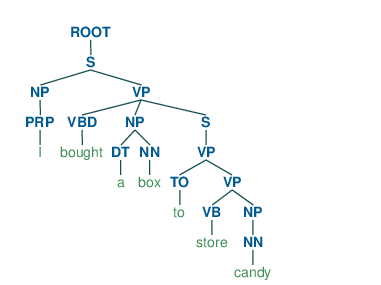

In [145]:
jupyter_draw_nltk_tree(tree)

In [2]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

In [10]:
import fasttext
from sapphire import Sapphire
model = fasttext.load_model("../model/wiki.en.bin")
aligner = Sapphire(model)

In [24]:
aligner.set_params(lambda_=0.5, delta=0.1, alpha=0.01, hungarian=True)
tokenized_sentence_a = "Leicester failed in both enterprises".split(' ')
tokenized_sentence_b = "He did not succeed in either case".split(' ')
word_alignment, phrase_alignment = aligner(tokenized_sentence_a, tokenized_sentence_b)

In [25]:
phrase_alignment

[(2, 2, 2, 2), (3, 3, 5, 5), (4, 4, 6, 6)]

In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp("Apples and oranges are similar. Boots and hippos aren't.")

for token in doc:
    print(token, token.lemma, token.lemma_)

Apples 8566208034543834098 apple
and 2283656566040971221 and
oranges 2208928596161743350 orange
are 10382539506755952630 be
similar 18166476740537071113 similar
. 12646065887601541794 .
Boots 9918665227421442029 boot
and 2283656566040971221 and
hippos 4133693291145879083 hippos
are 10382539506755952630 be
n't 2043519015752540944 n't
. 12646065887601541794 .
